In [1]:
# Interactions and ANOVA

In [7]:
# load libs and datasets
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import urlopen
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import statsmodels.api as sm
import pandas as pd
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

try:
    salary_table = pd.read_table('salary.table')
except:  # recent pandas can read URL without urlopen
    url = 'http://stats191.stanford.edu/data/salary.table'
    fh = urlopen(url)
    salary_table = pd.read_table(fh)
    salary_table.to_csv('salary.table')

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
salary_table.head()

,S,X,E,M
0,13876,1,1,1
1,11608,1,3,0
2,18701,1,3,1
3,11283,1,2,0
4,11767,1,3,0


In [9]:
E = salary_table.E
M = salary_table.M
X = salary_table.X
S = salary_table.S

In [ ]:
# EDA

Text(0,0.5,'Salary')

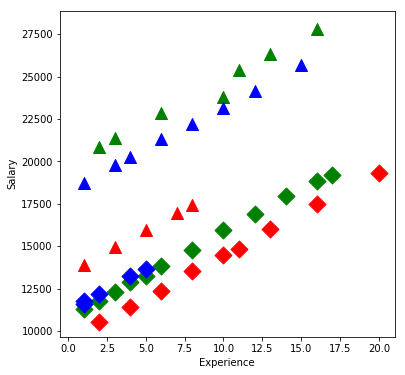

In [10]:
plt.figure(figsize=(6,6))
symbols = ['D', '^']
colors = ['r', 'g', 'blue']
factor_groups = salary_table.groupby(['E','M'])
for values, group in factor_groups:
    i,j = values
    plt.scatter(group['X'], group['S'], marker=symbols[j], color=colors[i-1],
               s=144)
plt.xlabel('Experience')
plt.ylabel('Salary')

In [13]:
factor_groups.head()

,S,X,E,M
0,13876,1,1,1
1,11608,1,3,0
2,18701,1,3,1
3,11283,1,2,0
4,11767,1,3,0
5,20872,2,2,1
6,11772,2,2,0
7,10535,2,1,0
8,12195,2,3,0
9,12313,3,2,0


In [26]:
factor_groups.describe()

S                                                                               X  \
    count          mean          std      min       25%      50%       75%      max count   
E M                                                                                         
1 0   9.0  14442.555556  2861.798609  10535.0  12336.00  14467.0  15990.00  19346.0   9.0   
  1   5.0  15839.600000  1445.880804  13876.0  14975.00  15965.0  16978.00  17404.0   5.0   
2 0  12.0  14913.083333  2793.898887  11283.0  12741.25  14321.0  17148.75  19207.0  12.0   
  1   7.0  24069.142857  2585.084939  20872.0  22127.50  23780.0  25870.00  27837.0   7.0   
3 0   5.0  12495.600000   914.545133  11608.0  11767.00  12195.0  13231.00  13677.0   5.0   
  1   8.0  21916.125000  2354.462355  18701.0  20147.25  21768.0  23423.00  25685.0   8.0   

                                                       
          mean       std  min   25%   50%   75%   max  
E M                                                    
1 0  10.000000  5.766281  2.0  6.00  10.0  13.0  20.0  
  1   4.800000  2.863564  1.0  3.00   5.0   7.0   8.0  
2 0   8.166667  5.556869  1.0  3.75   7.0  12.5  17.0  
  1   8.714286  5.219013  2.0  4.50  10.0  12.0  16.0  
3 0   2.600000  1.816590  1.0  1.00   2.0   4.0   5.0  
  1   7.375000  4.779047  1.0  3.75   7.0  10.5  15.0

In [38]:
# salary_table.groupby(['E','M'])
for values, group in factor_groups:
    print(values)

(1, 0)
(1, 1)
(2, 0)
(2, 1)
(3, 0)
(3, 1)


In [40]:
for values, group in factor_groups:
    print(values, group)

(1, 0)         S   X  E  M
7   10535   2  1  0
13  11417   4  1  0
20  12336   6  1  0
28  13548   8  1  0
29  14467  10  1  0
34  14861  11  1  0
37  15990  13  1  0
43  17483  16  1  0
45  19346  20  1  0
(1, 1)         S  X  E  M
0   13876  1  1  1
10  14975  3  1  1
19  15965  5  1  1
24  16978  7  1  1
26  17404  8  1  1
(2, 0)         S   X  E  M
3   11283   1  2  0
6   11772   2  2  0
9   12313   3  2  0
16  12884   4  2  0
17  13245   5  2  0
22  13839   6  2  0
25  14803   8  2  0
30  15942  10  2  0
35  16882  12  2  0
39  17949  14  2  0
42  18838  16  2  0
44  19207  17  2  0
(2, 1)         S   X  E  M
5   20872   2  2  1
11  21371   3  2  1
23  22884   6  2  1
32  23780  10  2  1
33  25410  11  2  1
38  26330  13  2  1
41  27837  16  2  1
(3, 0)         S  X  E  M
1   11608  1  3  0
4   11767  1  3  0
8   12195  2  3  0
15  13231  4  3  0
18  13677  5  3  0
(3, 1)         S   X  E  M
2   18701   1  3  1
12  19800   3  3  1
14  20263   4  3  1
21  21352   6  3  1
27  22184 

In [14]:
# simple linear model

In [15]:
formula = 'S ~ C(E) + C(M) + X'
lm = ols(formula, salary_table).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           2.23e-27
Time:                        20:18:15   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8035.5976    386.689     20.781      0.0

In [16]:
lm.model.exog[:5]

array([[1., 0., 0., 1., 1.],
       [1., 0., 1., 0., 1.],
       [1., 0., 1., 1., 1.],
       [1., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1.]])

In [17]:
# DataFrame available in
lm.model.data.orig_exog[:5]

,Intercept,C(E)[T.2],C(E)[T.3],C(M)[T.1],X
0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,1.0,1.0
3,1.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0


In [18]:
# original data
lm.model.data.frame[:5]

,S,X,E,M
0,13876,1,1,1
1,11608,1,3,0
2,18701,1,3,1
3,11283,1,2,0
4,11767,1,3,0


In [19]:
# influence stats

In [20]:
infl = lm.get_influence()
print(infl.summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0  13876.000  15465.313      0.104     -1.683      0.155     -0.722     -1.723     -0.739
         1  11608.000  11577.992      0.000      0.031      0.130      0.012      0.031      0.012
         2  18701.000  18461.523      0.001      0.247      0.109      0.086      0.244      0.085
         3  11283.000  11725.817      0.005     -0.458      0.113     -0.163     -0.453     -0.162
         4  11767.000  11577.992      0.001      0.197      0.130      0.076      0.195      0.075
         5  20872.000  19155.532      0.092      1.787      0.126      0.678      1.838      0.698
         6  11772.000  12272.001      0.006     -0.513      0.101     -0.172     -0.509     -0.170
         7

In [21]:
# also get a dataframe

In [22]:
df_infl = infl.summary_frame()
df_infl[:5]

,dfb_Intercept,dfb_C(E)[T.2],dfb_C(E)[T.3],dfb_C(M)[T.1],dfb_X,cooks_d,dffits,dffits_internal,hat_diag,standard_resid,student_resid
0,-0.505123,0.376134,0.483977,-0.369677,0.399111,0.104186,-0.738880,-0.721753,0.155327,-1.683099,-1.723037
1,0.004663,0.000145,0.006733,-0.006220,-0.004449,0.000029,0.011972,0.012120,0.130266,0.031318,0.030934
2,0.013627,0.000367,0.036876,0.030514,-0.034970,0.001492,0.085380,0.086377,0.109021,0.246931,0.244082
3,-0.083152,-0.074411,0.009704,0.053783,0.105122,0.005338,-0.161773,-0.163364,0.113030,-0.457630,-0.453173
4,0.029382,0.000917,0.042425,-0.039198,-0.028036,0.001166,0.075439,0.076340,0.130266,0.197257,0.194929


In [ ]:
# Now plot the reiduals within the groups separately:

Text(0,0.5,'Residuals')

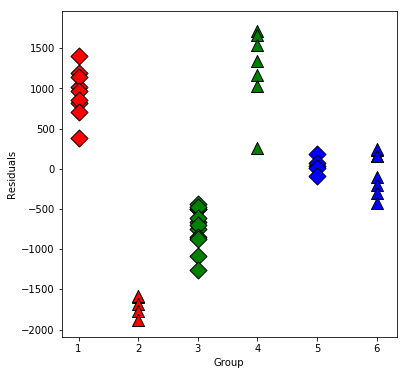

In [23]:
resid = lm.resid
plt.figure(figsize=(6,6));
for values, group in factor_groups:
    i,j = values
    group_num = i*2 + j - 1  # for plotting purposes
    x = [group_num] * len(group)
    plt.scatter(x, resid[group.index], marker=symbols[j], color=colors[i-1],
            s=144, edgecolors='black')
plt.xlabel('Group');
plt.ylabel('Residuals')

In [ ]:
# Now we will test some interactions using anova or f_test

In [24]:
interX_lm = ols("S ~ C(E) * X + C(M)", salary_table).fit()
print(interX_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     158.6
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           8.23e-26
Time:                        20:28:09   Log-Likelihood:                -379.47
No. Observations:                  46   AIC:                             772.9
Df Residuals:                      39   BIC:                             785.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7256.2800    549.494     13.205      

In [ ]:
# ANOVA check

In [27]:
from statsmodels.stats.api import anova_lm

In [30]:
table1 = anova_lm(lm, interX_lm)
print(table1)

   df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0      41.0  4.328072e+07      0.0           NaN       NaN       NaN
1      39.0  3.941068e+07      2.0  3.870040e+06  1.914856  0.160964


In [31]:
interM_lm = ols("S ~ X + C(E)*C(M)", data=salary_table).fit()
print(interM_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5517.
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           1.67e-55
Time:                        20:38:01   Log-Likelihood:                -298.74
No. Observations:                  46   AIC:                             611.5
Df Residuals:                      39   BIC:                             624.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            9472.6854    

In [32]:
table2 = anova_lm(lm, interM_lm)
print(table2)

   df_resid           ssr  df_diff       ss_diff           F        Pr(>F)
0      41.0  4.328072e+07      0.0           NaN         NaN           NaN
1      39.0  1.178168e+06      2.0  4.210255e+07  696.844466  3.025504e-31


In [33]:
# The design matrix as a DataFrame
interM_lm.model.data.orig_exog[:5]

,Intercept,C(E)[T.2],C(E)[T.3],C(M)[T.1],C(E)[T.2]:C(M)[T.1],C(E)[T.3]:C(M)[T.1],X
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,1.0,0.0,1.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [34]:
# The design matrix as an ndarray
interM_lm.model.exog
interM_lm.model.exog_names

['Intercept',
 'C(E)[T.2]',
 'C(E)[T.3]',
 'C(M)[T.1]',
 'C(E)[T.2]:C(M)[T.1]',
 'C(E)[T.3]:C(M)[T.1]',
 'X']

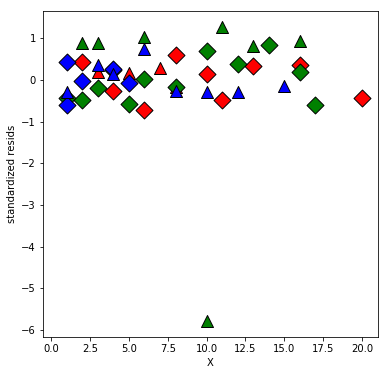

In [35]:
# identify outliers
infl = interM_lm.get_influence()
resid = infl.resid_studentized_internal
plt.figure(figsize=(6,6))
for values, group in factor_groups:
    i,j = values
    idx = group.index
    plt.scatter(X[idx], resid[idx], marker=symbols[j], color=colors[i-1],
            s=144, edgecolors='black')
plt.xlabel('X');
plt.ylabel('standardized resids')
# it has three colors, two shapes !!!

In [41]:
drop_idx = abs(resid).argmax()
print(drop_idx)  # zero-based index
idx = salary_table.index.drop(drop_idx)

lm32 = ols('S ~ C(E) + X + C(M)', data=salary_table, subset=idx).fit()

print(lm32.summary())
print('\n')

interX_lm32 = ols('S ~ C(E) * X + C(M)', data=salary_table, subset=idx).fit()

print(interX_lm32.summary())
print('\n')


table3 = anova_lm(lm32, interX_lm32)
print(table3)
print('\n')


interM_lm32 = ols('S ~ X + C(E) * C(M)', data=salary_table, subset=idx).fit()

table4 = anova_lm(lm32, interM_lm32)
print(table4)
print('\n')

32
                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     211.7
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           2.45e-26
Time:                        20:59:51   Log-Likelihood:                -373.79
No. Observations:                  45   AIC:                             757.6
Df Residuals:                      40   BIC:                             766.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8044.7518    392.781     20.482      

Text(0,0.5,'standardized resids')

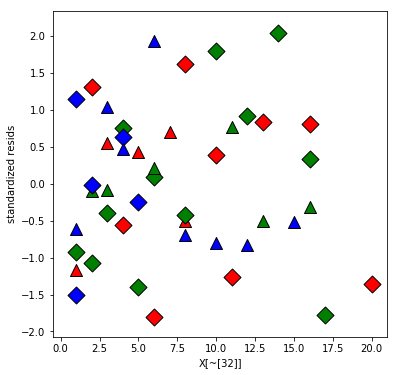

In [42]:
# Replot the residuals
try:
    resid = interM_lm32.get_influence().summary_frame()['standard_resid']
except:
    resid = interM_lm32.get_influence().summary_frame()['standard_resid']

plt.figure(figsize=(6,6))
for values, group in factor_groups:
    i,j = values
    idx = group.index
    plt.scatter(X[idx], resid[idx], marker=symbols[j], color=colors[i-1],
            s=144, edgecolors='black')
plt.xlabel('X[~[32]]');
plt.ylabel('standardized resids')

In [ ]:
# Plot the fitted values


Text(0,0.5,'Salary')

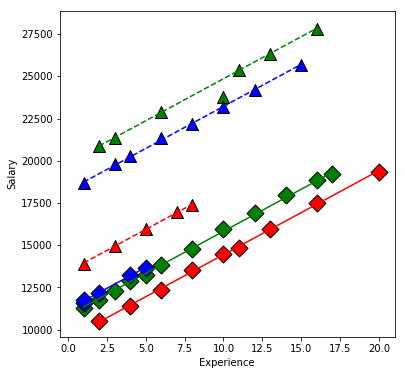

In [43]:
lm_final = ols('S ~ X + C(E)*C(M)', data = salary_table.drop([drop_idx])).fit()
mf = lm_final.model.data.orig_exog
lstyle = ['-','--']

plt.figure(figsize=(6,6))
for values, group in factor_groups:
    i,j = values
    idx = group.index
    plt.scatter(X[idx], S[idx], marker=symbols[j], color=colors[i-1],
                s=144, edgecolors='black')
    # drop NA because there is no idx 32 in the final model
    plt.plot(mf.X[idx].dropna(), lm_final.fittedvalues[idx].dropna(),
            ls=lstyle[j], color=colors[i-1])
plt.xlabel('Experience')
plt.ylabel('Salary')

From our first look at the data, the difference between Master's and PhD in the management group is different than in the non-management group. This is an interaction between the two qualitative variables management,M and education,E. We can visualize this by first removing the effect of experience, then plotting the means within each of the 6 groups using interaction.plot.

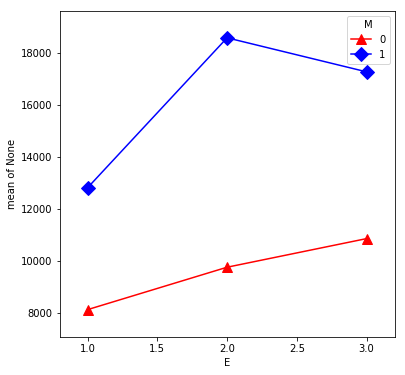

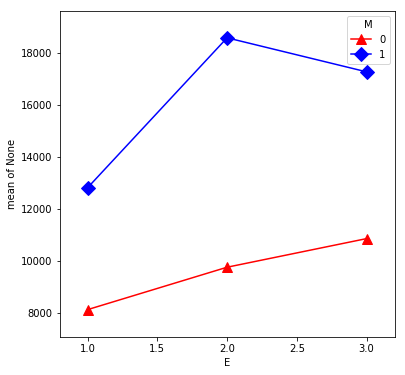

In [44]:
U = S - X * interX_lm32.params['X']

plt.figure(figsize=(6,6))
interaction_plot(E, M, U, colors=['red','blue'], markers=['^','D'],
        markersize=10, ax=plt.gca())

In [ ]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html